In [3]:
 pip install SQLAlchemy pymysql

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sqlalchemy import create_engine  

In [7]:
import pandas as pd

In [9]:
host = "localhost"
user = "root"
password = "Jaysadguru#god"
database = "project"

In [11]:
conn= f"mysql+pymysql://{user}:{password}@{host}/{database}"

In [13]:
connection = create_engine(conn)

In [15]:
query_customers = "select * from customers"

In [17]:
df1 = pd.read_sql(query_customers, connection)

In [19]:
print(df1)

     CustomerID     CustomerName                    Country
0          1001  Christopher Fry                   Pakistan
1          1002       Chad Reyes             Norfolk Island
2          1003   Monique Duarte                       Iran
3          1004    Melissa Wiley                     Greece
4          1005    Misty Mcguire                     Sweden
..          ...              ...                        ...
995        1996    Eric Martinez  Bouvet Island (Bouvetoya)
996        1997    Brandon Brown                 Mozambique
997        1998      Dana Powers                   Maldives
998        1999    Wesley Cuevas               Saint Martin
999        2000  Andrew Williams                     Guyana

[1000 rows x 3 columns]


In [21]:
query_products = "select * from products"

In [23]:
df2 = pd.read_sql(query_products, connection)

In [25]:
print(df2)

     ProductID      ProductName  ProductCategory
0         2001           Camera      Electronics
1         2002           Laptop      Electronics
2         2003       Headphones      Electronics
3         2004           Heater  Home Appliances
4         2005          Printer      Electronics
..         ...              ...              ...
995       2996  Washing Machine  Home Appliances
996       2997           Tablet      Electronics
997       2998           Laptop      Electronics
998       2999   Vacuum Cleaner  Home Appliances
999       3000           Laptop      Electronics

[1000 rows x 3 columns]


In [27]:
query_purchases = "select * from purchases"

In [29]:
df3 = pd.read_sql(query_purchases, connection)

In [31]:
print(df3)

     TransactionID  CustomerID  ProductID  PurchaseQuantity  PurchasePrice  \
0                1        1454       2008                 5         689.99   
1                2        1062       2001                 4          79.27   
2                3        1604       2017                 3         666.75   
3                4        1947       2014                 5         316.19   
4                5        1059       2010                 4         700.24   
..             ...         ...        ...               ...            ...   
995            996        1076       2017                 2         796.67   
996            997        1181       2016                 5         271.88   
997            998        1253       2020                 5         594.69   
998            999        1255       2005                 4         140.89   
999           1000        1626       2043                 5         861.00   

    PurchaseDate  
0     2024-03-01  
1     2024-01-26  
2     

In [33]:
customers = pd.read_sql("select * from customers", connection)
products = pd.read_sql("select * from  products", connection)
purchases = pd.read_sql("select * from  purchases", connection)


In [35]:
# Calculate total purchases 
total_purchases = purchases['PurchaseQuantity'].sum()
print("Total purchases :", total_purchases)

Total purchases : 3053


In [87]:
# total revenue
purchases['total_price'] = purchases['PurchaseQuantity'] * purchases['PurchasePrice']
total_revenue = purchases['total_price'].sum()
print("Total revenue :", total_revenue)

Total revenue : 1485760.55


In [39]:
# average purchase value
average_purchase_value = total_revenue / total_purchases
print("average purchase value :",round(average_purchase_value,2))

average purchase value : 486.66


In [41]:
import matplotlib.pyplot as plt

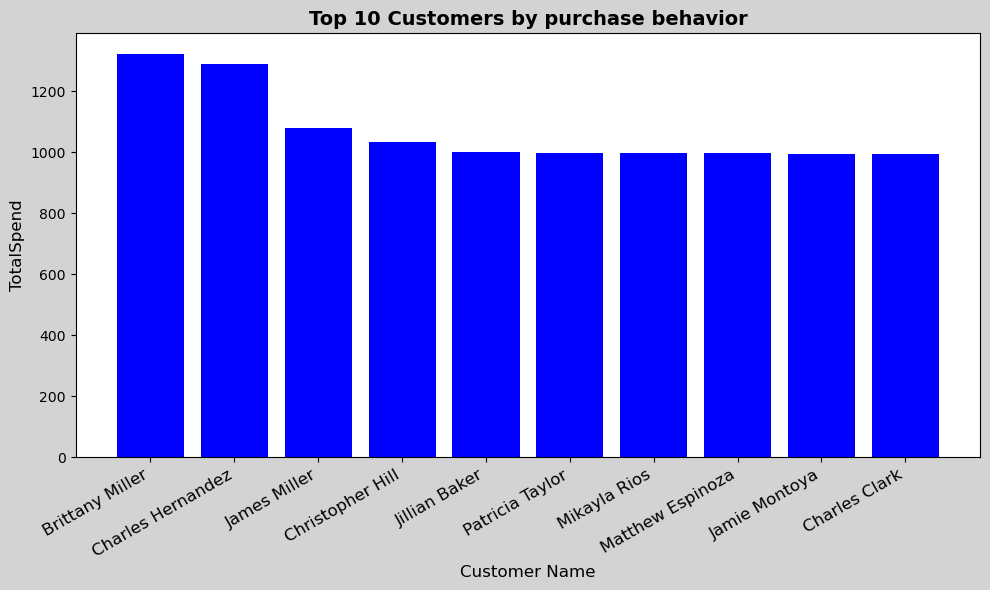

In [43]:
# Identify top customers and their purchasing behavior chart.
merged = pd.merge(purchases, customers, on='CustomerID')
top_customers = merged.groupby('CustomerName')['PurchasePrice'].sum().nlargest(10).reset_index()
top_customers.columns = ['CustomerName', 'TotalSpend']
plt.figure(figsize=(10, 6))
plt.gcf().patch.set_facecolor('lightgrey')
plt.gca().set_facecolor('white')
plt.bar(top_customers['CustomerName'], top_customers['TotalSpend'], color='blue')
plt.title('Top 10 Customers by purchase behavior', fontsize=14, fontweight='bold')
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('TotalSpend', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [45]:
# Identify top customers and their purchasing behavior.
merged = pd.merge(purchases, customers, on='CustomerID')
top_customers = merged.groupby('CustomerName')['PurchasePrice'].sum().nlargest(10).reset_index()
print("Top 10 Customers by Purchase behavior \n:")
print(top_customers.head(10))

Top 10 Customers by Purchase behavior 
:
        CustomerName  PurchasePrice
0    Brittany Miller        1324.45
1  Charles Hernandez        1289.25
2       James Miller        1080.46
3   Christopher Hill        1034.04
4      Jillian Baker         999.98
5    Patricia Taylor         999.44
6       Mikayla Rios         998.17
7   Matthew Espinoza         997.45
8      Jamie Montoya         996.01
9      Charles Clark         995.97


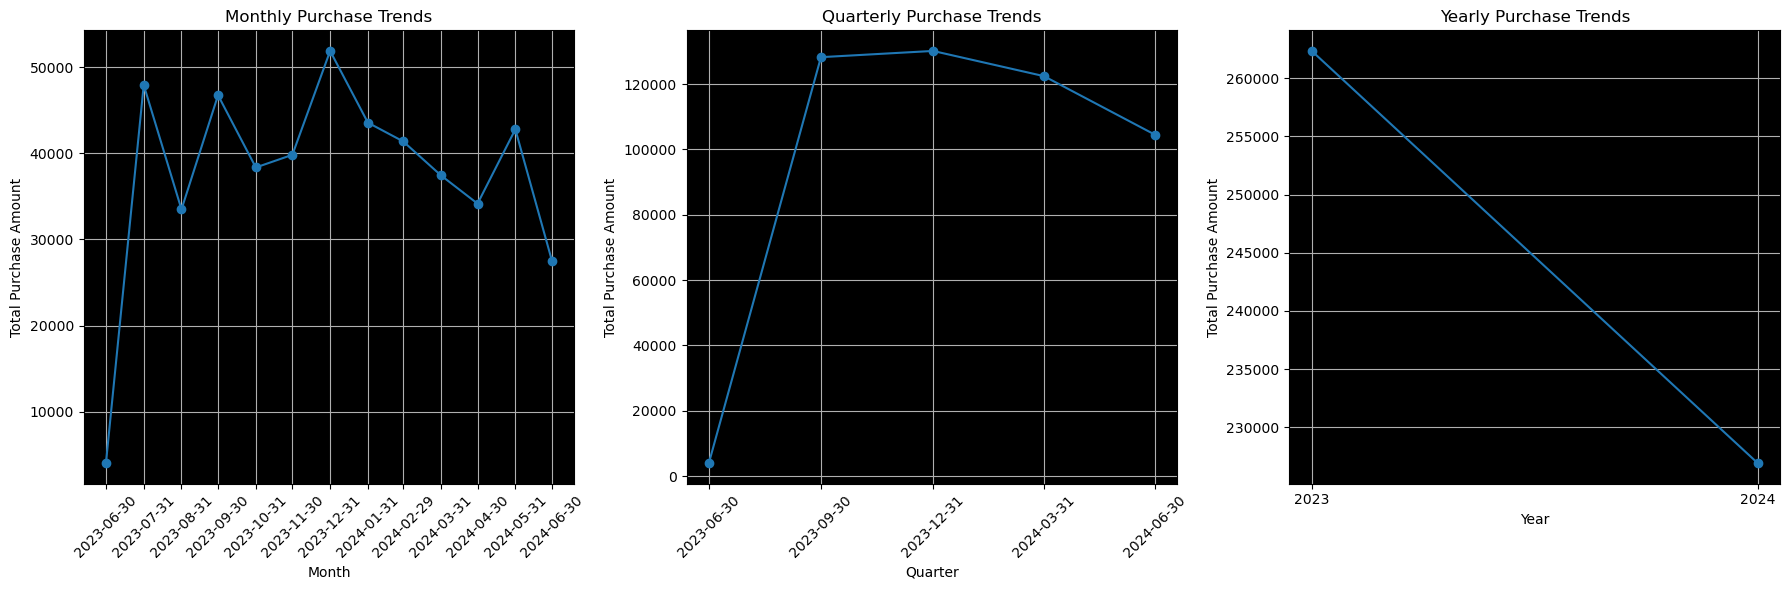

In [47]:
# Analyze purchase trends over time (monthly, quarterly, yearly) chart.
purchases = pd.read_sql("SELECT * FROM purchases", connection)
purchases['PurchaseDate'] = pd.to_datetime(purchases['PurchaseDate'])
purchases.set_index('PurchaseDate', inplace=True)
monthly = purchases.resample('ME')['PurchasePrice'].sum()
quarterly = purchases.resample('QE')['PurchasePrice'].sum()
yearly = purchases.resample('YE')['PurchasePrice'].sum()
plt.figure(figsize=(18, 6))

# Monthly data 
plt.subplot(1, 3, 1)
plt.plot(monthly.index, monthly.values, marker='o', linestyle='-', label='Monthly')
plt.title('Monthly Purchase Trends')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(monthly.index, rotation=45)  
plt.gca().set_facecolor('black')
plt.grid(True)
# Quarterly data 
plt.subplot(1, 3, 2)
plt.plot(quarterly.index, quarterly.values, marker='o', linestyle='-', label='Quarterly')
plt.title('Quarterly Purchase Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Purchase Amount')
plt.xticks(quarterly.index, rotation=45) 
plt.gca().set_facecolor('black')
plt.grid(True)

# Yearly data 
plt.subplot(1, 3, 3)
plt.plot(yearly.index.year, yearly.values, marker='o', linestyle='-', label='Yearly')
plt.title('Yearly Purchase Trends')
plt.xlabel('Year')
plt.ylabel('Total Purchase Amount')
plt.xticks(yearly.index.year)  
plt.gca().set_facecolor('black')
plt.grid(True)

plt.tight_layout()
plt.show()


In [55]:
# Analyze purchase trends over time (monthly, quarterly, yearly) chart.
purchases = pd.read_sql("select * from  purchases", connection)
purchases['PurchaseDate'] = pd.to_datetime(purchases['PurchaseDate'])
purchases.set_index('PurchaseDate', inplace=True)
monthly = purchases.resample('ME')['PurchasePrice'].sum().reset_index()
quarterly = purchases.resample('QE')['PurchasePrice'].sum().reset_index()
yearly = purchases.resample('YE')['PurchasePrice'].sum().reset_index()
print("monthly_data \n")
print(monthly, "\n")
print("quarterly_data \n")
print(quarterly,  "\n")
print("yearly_data \n")
print(yearly)




monthly_data 

   PurchaseDate  PurchasePrice
0    2023-06-30        4012.44
1    2023-07-31       47956.69
2    2023-08-31       33493.46
3    2023-09-30       46764.80
4    2023-10-31       38368.97
5    2023-11-30       39839.29
6    2023-12-31       51910.42
7    2024-01-31       43575.14
8    2024-02-29       41393.77
9    2024-03-31       37442.66
10   2024-04-30       34165.64
11   2024-05-31       42799.97
12   2024-06-30       27551.47 

quarterly_data 

  PurchaseDate  PurchasePrice
0   2023-06-30        4012.44
1   2023-09-30      128214.95
2   2023-12-31      130118.68
3   2024-03-31      122411.57
4   2024-06-30      104517.08 

yearly_data 

  PurchaseDate  PurchasePrice
0   2023-12-31      262346.07
1   2024-12-31      226928.65


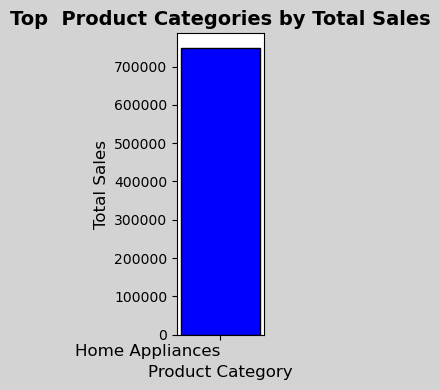

In [63]:
# top product category
merged_data = pd.merge(purchases, products, on='ProductID')
merged_data['TotalSales'] = merged_data['PurchaseQuantity'] * merged_data['PurchasePrice']
top_product_categories = merged_data.groupby('ProductCategory')['TotalSales'].sum().nlargest(1).reset_index()
top_product_categories.columns = ['ProductCategory', 'TotalSales']
plt.figure(figsize=(2, 4))  
plt.gcf().patch.set_facecolor('lightgrey')  
plt.gca().set_facecolor('white') 
plt.bar(top_product_categories['ProductCategory'], top_product_categories['TotalSales'], color='blue', edgecolor='black')
plt.title('Top  Product Categories by Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0, ha='right', fontsize=12)  
plt.tight_layout()
plt.show()

In [65]:
# top product category
merged_data = pd.merge(purchases, products, on='ProductID')
merged_data['TotalSales'] = merged_data['PurchaseQuantity'] * merged_data['PurchasePrice']
top_product_categories = merged_data.groupby('ProductCategory')['TotalSales'].sum().nlargest(1).reset_index()
top_product_categories.columns = ['ProductCategory', 'TotalSales']
print(top_product_categories)

   ProductCategory  TotalSales
0  Home Appliances   749315.29


In [107]:
# Total number of customer from each country in 2023
purchases = pd.read_sql("select * from  purchases", connection)
purchases['PurchaseDate'] = pd.to_datetime(purchases['PurchaseDate'])
purchases_2023 = purchases[purchases['PurchaseDate'].dt.year == 2023]
merged_2023 = pd.merge(purchases_2023, customers, on='CustomerID')
unique_customers_2023 = merged_2023.drop_duplicates(subset='CustomerID')
customers_per_country_2023 = unique_customers_2023['Country'].value_counts().reset_index()
customers_per_country_2023.columns = ['Country', 'TotalCustomers']
print(customers_per_country_2023)

          Country  TotalCustomers
0           Palau               7
1      Luxembourg               7
2          Israel               7
3     Saint Lucia               7
4           Italy               6
..            ...             ...
214  Saint Helena               1
215      Malaysia               1
216       Bahamas               1
217       Lesotho               1
218        Jersey               1

[219 rows x 2 columns]


In [109]:
# Total number of customer from each country in 2024
purchases = pd.read_sql("select * from  purchases", connection)
purchases['PurchaseDate'] = pd.to_datetime(purchases['PurchaseDate'])
purchases_2024 = purchases[purchases['PurchaseDate'].dt.year == 2024]
merged_2024 = pd.merge(purchases_2024, customers, on='CustomerID')
unique_customers_2024 = merged_2024.drop_duplicates(subset='CustomerID')
customers_per_country_2024 = unique_customers_2024['Country'].value_counts().reset_index()
customers_per_country_2024.columns = ['Country', 'TotalCustomers']
print(customers_per_country_2024)

                 Country  TotalCustomers
0            Philippines               8
1               Barbados               6
2                  Nauru               6
3           Saint Helena               6
4             Montenegro               5
..                   ...             ...
207  Antigua and Barbuda               1
208           Mauritania               1
209            Guatemala               1
210         Saudi Arabia               1
211                Gabon               1

[212 rows x 2 columns]


In [73]:
# Calculate total purchase quantity for each country
data_merged = pd.merge(customers,purchases, on='CustomerID')
total_purchase_quantity_per_country = data_merged.groupby('Country')['PurchaseQuantity'].sum().reset_index()
total_purchase_quantity_per_country.columns = ['Country', 'TotalPurchaseQuantity']
print(total_purchase_quantity_per_country)

               Country  TotalPurchaseQuantity
0          Afghanistan                     14
1              Albania                     19
2              Algeria                     18
3       American Samoa                     13
4              Andorra                      6
..                 ...                    ...
233  Wallis and Futuna                     20
234     Western Sahara                      4
235              Yemen                     10
236             Zambia                     14
237           Zimbabwe                     11

[238 rows x 2 columns]


In [111]:
# Generate a summary report with key insights.
summary_report = {
    "Total Purchase": total_purchases,
    "Total reveune": total_revenue,
    "Average of purchase": average_purchase_value,
    "Top Customers by purchase behavior": top_customers,
    "Purchase trends over monthly": monthly,
    "Purchase trends over quarterly": quarterly,
    "Purchase trends over yearly": yearly,
    "Top Product Categories by Total Sales": top_product_categories,
    "Total number of customer from each country in 2023": customers_per_country_2023,
    "Total number of customer from each country in 2024": customers_per_country_2024,
    "total purchase quantity for each country": total_purchase_quantity_per_country 
}
